# Procesamiento Digital de Audio
## Caleb Rascón 
### Separación de Fuentes en Línea

### DAS - Delay and Sum Classic Beamforming

In [28]:
#Bibliotecas
import numpy as np
from matplotlib import pyplot as plt
from delay_f import delay_f 
from trianglewave import trianglewave

In [29]:
# Parameters
doa1 = 20 * np.pi / 180  # direction of arrival of first signal
doa2 = -40 * np.pi / 180  # direction of arrival of second signal
doa_steer = doa1  # direction to steer the beamformer (original: doa1)
d = 4  # distance between microphones in meters
M = 8  # number of microphones
N = 200  # signal size in samples

In [30]:
# Simulating signals
t = np.arange(1, N + 1) / N  # time vector (1 second)
c = 343  # speed of sound
fs = N  # sampling frequency same as signal size (1 second)

# Original signals
s1 = np.cos(2 * np.pi * 2 * t)
s2 = trianglewave(10, N) * 0.5

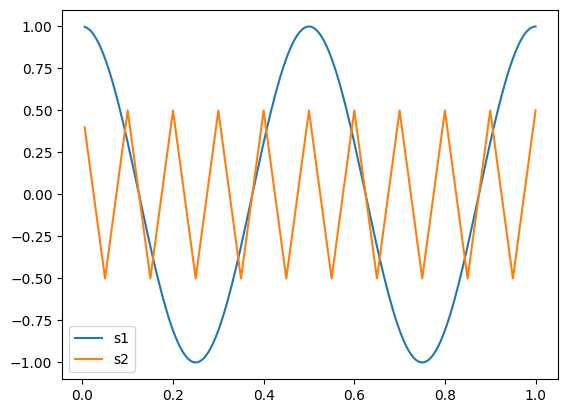

In [31]:
plt.plot(t, s1, label='s1')
plt.plot(t, s2, label='s2')
plt.legend()
plt.show()

In [32]:
# Microphones (input signals)
X = np.zeros((M, N))
X[0, :] = s1 + s2
for m in range(1, M):
    X[m, :] = delay_f(s1, (m * d / c) * np.sin(doa1), N) + delay_f(s2, (m * d / c) * np.sin(doa2), N)

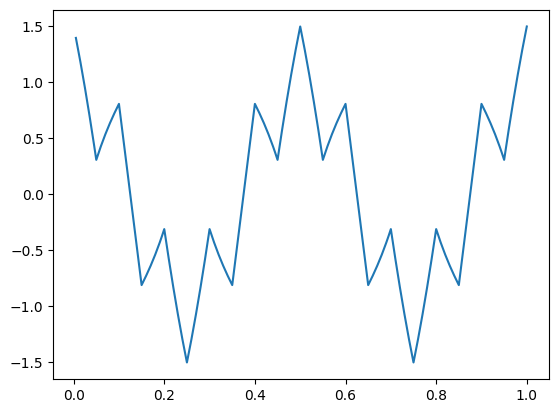

In [33]:

plt.plot(t, X[0, :])
plt.show()

In [34]:
# Delay-and-Sum beamforming
# Calculating the steering vector
w_c = np.zeros((M, N), dtype=complex)

w = np.concatenate(([0], np.arange(1, N//2 + 1), np.arange(-N//2 + 1, 0))) / N * fs
w_c[0, :] = np.ones(N)
for m in range(1, M):
    for f in range(N):
        w_c[m, f] = np.exp(-1j * (2 * np.pi * w[f] * m * d / c) * np.sin(doa_steer))

# FFT
for m in range(M):
    X[m, :] = np.real(np.fft.fft(X[m, :]))

# Applying beamformer
o_f = np.zeros(N, dtype=complex)
for f in range(1, N):
    o_f[f] = np.dot(w_c[:, f].conj().T, X[:, f]) / M

o = np.real(np.fft.ifft(o_f))



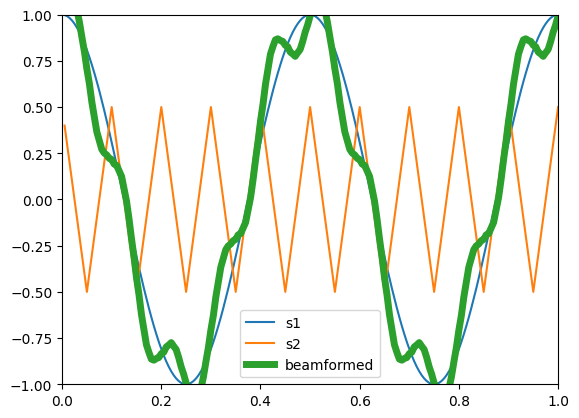

In [35]:
plt.plot(t, s1, label='s1')
plt.plot(t, s2, label='s2')
plt.plot(t, o, label='beamformed', linewidth=5)
plt.axis([0, 1, -1, 1])
plt.legend()
plt.show()